# IMPORT LIBS

In [20]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# PANDAS OPTIONS

In [21]:
pd.options.display.float_format = '{:.0f}'.format

# OPEN DATASETS

In [32]:
df = pd.read_csv('../DATA/IN/extract_gold_dvf.csv', sep=';')
df

C:\Users\jonat\AppData\Local\Temp\ipykernel_16972\2153843929.py:1: DtypeWarning: Columns (15,17,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../DATA/IN/extract_gold_dvf.csv', sep=';')


,NoDisp,DateMutation,ValeurFonciere,NoVoie,BTQ,TypeVoie,CodeVoie,Voie,CP,Commune,...,SurfaceCarrez4emeLot,CinquiemeLot,SurfaceCarrez5emeLot,NombreLots,CodeTypeLocal,SurfaceReelleBati,NombrePiecesPrincipales,NatureCulture,NatureCultureSpeciale,SurfaceTerrain
0,1,2018-07-02,239870,5004,NaN,RUE,0236,PRINCIPALE,33460,LAMARQUE,...,NaN,NaN,NaN,0,1,55,2,S,NaN,83
1,1,2018-07-05,218000,11,NaN,LOT,A018,LE JARDIN D ALIENOR,33185,LE HAILLAN,...,NaN,NaN,NaN,2,2,62,3,NaN,NaN,NaN
2,1,2018-07-06,376900,14,NaN,RUE,0224,ALBERT CAMUS,33320,LE TAILLAN MEDOC,...,NaN,NaN,NaN,0,1,96,4,S,NaN,822
3,1,2018-07-04,149000,9002,NaN,NaN,A097,LE DOMAINE DU GOLF I,33680,LACANAU,...,NaN,NaN,NaN,1,1,44,3,NaN,NaN,NaN
4,1,2018-07-04,120000,5,NaN,CHE,0270,DES SABLES,33460,LAMARQUE,...,NaN,NaN,NaN,0,1,58,4,S,NaN,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175012,1,2023-06-28,140000,80,NaN,CHEM,0267,DU TONNELIER,33860,VAL-DE-LIVENNE,...,NaN,NaN,NaN,0,1,200,8,S,NaN,1922
175013,1,2023-06-29,80000,11,NaN,CITE,A035,LA MAINGRETTE,33820,SAINT-CIERS-SUR-GIRONDE,...,NaN,NaN,NaN,0,1,73,4,S,NaN,237
175014,1,2023-05-02,155000,54,NaN,LOT,A010,LES VIGNES 1,33830,BELIN-BELIET,...,NaN,NaN,NaN,0,1,78,4,S,NaN,600
175015,1,2023-06-28,111150,15,B,RUE,0510,FABRE,33210,LANGON,...,NaN,NaN,NaN,0,1,82,2,S,NaN,51


# FIRST ANALYS 

In [23]:
df.dtypes

NoDisp                       int64
DateMutation                object
ValeurFonciere              object
NoVoie                     float64
BTQ                         object
TypeVoie                    object
CodeVoie                    object
Voie                        object
CP                           int64
Commune                     object
CodeDepartement              int64
CodeCommune                  int64
PrefixeSection             float64
Section                     object
NoPlan                       int64
PremierLot                  object
SurfaceCarrez1erLot        float64
DeuxiemeLot                 object
SurfaceCarrez2emeLot       float64
TroisiemeLot               float64
SurfaceCarrez3emeLot       float64
QuatriemeLot               float64
SurfaceCarrez4emeLot       float64
CinquiemeLot               float64
SurfaceCarrez5emeLot       float64
NombreLots                   int64
CodeTypeLocal                int64
SurfaceReelleBati          float64
NombrePiecesPrincipa

#### Colum type to change :

- ValeurFonciere à transformer en float
- NoVoie à transformer en int
- NombrePiecesPrincipales à transformer en int

# FIRST MODIFICATIONS

In [33]:
# Modification of ValeurFonciere
df['ValeurFonciere'] = df['ValeurFonciere'].str.replace(',', '.').astype(float)

In [34]:
# Modification of NoVoie

#Transform NA values to 0
df['NoVoie'] = df['NoVoie'].fillna(0)

# Modification of NoVoie type
df['NoVoie'] = df['NoVoie'].astype(int)

In [35]:
# Modification of non numeric values of NombrePiecesPrincipales 

df['NombrePiecesPrincipales'] = (
    pd.to_numeric(df['NombrePiecesPrincipales'],
                  errors='coerce')
    .fillna(0)
)

# Modification of NombrePiecesPrincipales type
df['NombrePiecesPrincipales'] = df['NombrePiecesPrincipales'].astype(int)

In [38]:
df.dtypes

NoDisp                       int64
DateMutation                object
ValeurFonciere             float64
NoVoie                       int32
BTQ                         object
TypeVoie                    object
CodeVoie                    object
Voie                        object
CP                           int64
Commune                     object
CodeDepartement              int64
CodeCommune                  int64
PrefixeSection             float64
Section                     object
NoPlan                       int64
PremierLot                  object
SurfaceCarrez1erLot        float64
DeuxiemeLot                 object
SurfaceCarrez2emeLot       float64
TroisiemeLot               float64
SurfaceCarrez3emeLot       float64
QuatriemeLot               float64
SurfaceCarrez4emeLot       float64
CinquiemeLot               float64
SurfaceCarrez5emeLot       float64
NombreLots                   int64
CodeTypeLocal                int64
SurfaceReelleBati          float64
NombrePiecesPrincipa

# ANALYS

In [39]:
df.describe()

,NoDisp,ValeurFonciere,NoVoie,CP,CodeDepartement,CodeCommune,PrefixeSection,NoPlan,SurfaceCarrez1erLot,SurfaceCarrez2emeLot,...,SurfaceCarrez3emeLot,QuatriemeLot,SurfaceCarrez4emeLot,CinquiemeLot,SurfaceCarrez5emeLot,NombreLots,CodeTypeLocal,SurfaceReelleBati,NombrePiecesPrincipales,SurfaceTerrain
count,175017,174644,175017,175017,175017,175017,888,175017,30653,2974,...,397,348,114,153,84,175017,175017,175011,175017,115569
mean,1,603062,466,33403,33,226,211,376,5667,6058,...,5573,61,3734,56,2800,0,1,87,4,3096
std,0,1910822,1818,264,0,171,174,505,5569,2673,...,3028,280,3066,78,2513,1,1,49,2,19125
min,1,1,0,33000,33,1,41,1,144,189,...,804,2,600,2,0,0,1,1,0,1
25%,1,166000,8,33185,33,63,41,88,3747,4214,...,3581,6,2099,7,2379,0,1,53,2,281
50%,1,260000,23,33380,33,200,107,203,5203,6098,...,5756,20,2099,41,2379,0,1,80,4,522
75%,1,419000,70,33610,33,339,346,455,6972,7533,...,6783,91,4547,93,2379,1,2,108,4,936
max,43,72277368,9999,33990,33,555,495,6250,620200,31000,...,26234,5078,15670,867,14470,17,146,1000,54,382680


#### PENSER A VERIFIER LES DATA QUALITATIVE (STRING)

- Certains biens ne semblent pas avoir de valeur foncière (174 644 VF pour 175 017 bien) sachant que c'est notre Label, nous supprimerons les individus avec cette valeur manquante.
- Certains biens semblent avoir une VF Outliers (MAX 7 227 736 800 et MIN 1) verif. leurs nombres
- Les Prefix. de Section ne sont pas renseignés (888 pour 175 017 biens...) on ne pourra pas s'appuyer sur le cadastre pour construire une DATA VIZ géographique 
- Pour rappel Code Type Local : 
    - 1 Maison 
    - 2 Appt.
- 6 biens n'ont pas de Surface Réel Bati., nous supprimerons ces individus
- Idems pour Nombre de pièçes principales (de plus certains biens sont outliers sur cette variable) on a des biens à 0 et des bien à 54 
- Pour la surface du terrain, certains biens sont à 0, d'autre ont une surface de 382 680 vérif. les outliers.

# FIRST FEATURE ENGINEERING

 ### ADD A PRICE RANGE FEATURE 

In [47]:
# Définir les tranches de valeur foncière
bins = [50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 600000, 750000, 1000000, 1500000, 2000000, 3000000, 4000000, 5000000, 6000000, df['ValeurFonciere'].max()]

# Utiliser cut pour créer une nouvelle colonne 'Tranche'
df['Tranche'] = pd.cut(df['ValeurFonciere'], bins=bins, right=False)

### DISPLAY NUMBER OF BUILDING BY PRICE RANGE

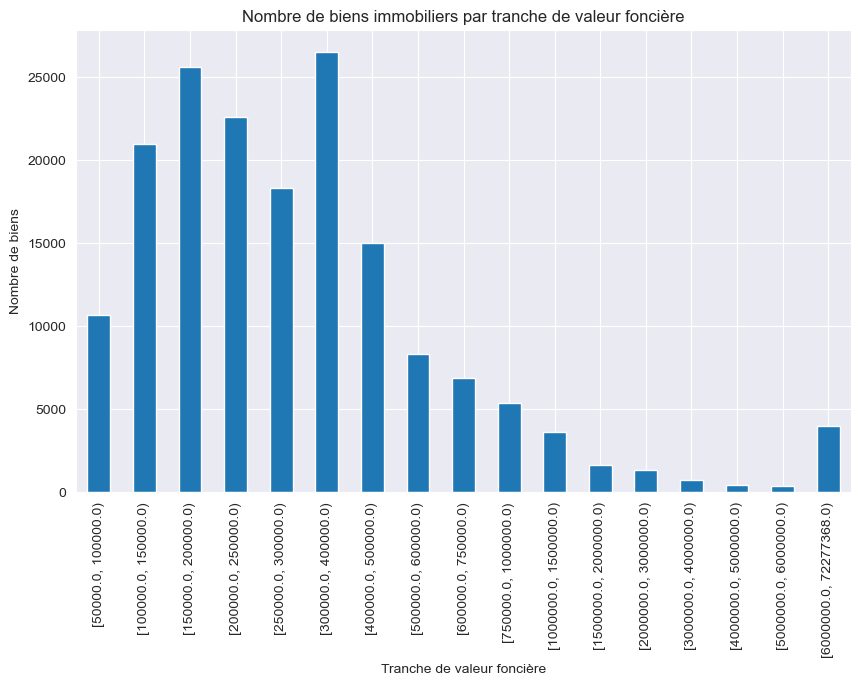

In [48]:
# Compter les biens par tranche
tranche_count = df['Tranche'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(10, 6))
tranche_count.plot(kind='bar')
plt.title('Nombre de biens immobiliers par tranche de valeur foncière')
plt.xlabel('Tranche de valeur foncière')
plt.ylabel('Nombre de biens')
plt.show()

# ANALYS

In [52]:
maison = df.loc[(df['CodeTypeLocal'] == 1 )]

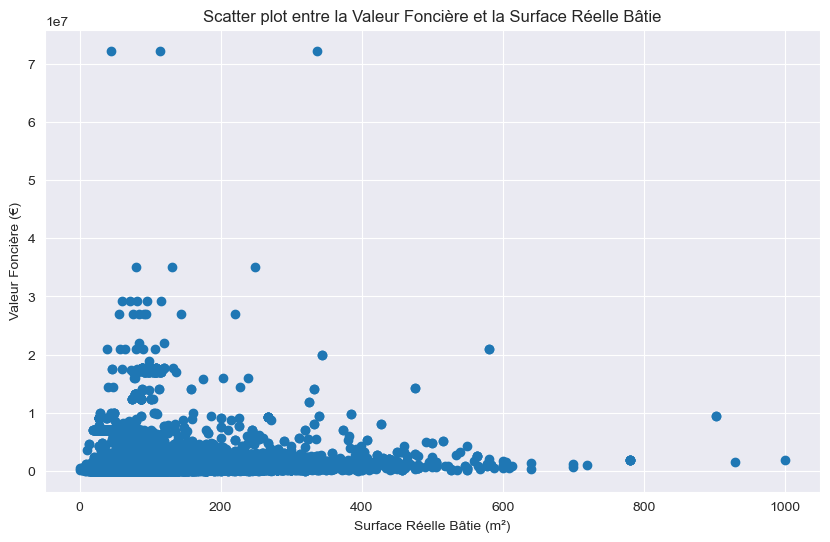

In [53]:
# Créer un scatter plot entre 'ValeurFonciere' et 'SurfaceReelleBati'
plt.figure(figsize=(10, 6))
plt.scatter(maison['SurfaceReelleBati'], maison['ValeurFonciere'])
plt.title('Scatter plot entre la Valeur Foncière et la Surface Réelle Bâtie')
plt.xlabel('Surface Réelle Bâtie (m²)')
plt.ylabel('Valeur Foncière (€)')
plt.grid(True)
plt.show()